In [1]:
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.PETS)

In [3]:
path.ls()

(#2) [Path('C:/Users/Administrator/.fastai/data/oxford-iiit-pet/annotations'),Path('C:/Users/Administrator/.fastai/data/oxford-iiit-pet/images')]

In [9]:
files=get_image_files(path/'images')
len(files)

7390

In [10]:
files[:10]

(#10) [Path('C:/Users/Administrator/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg'),Path('C:/Users/Administrator/.fastai/data/oxford-iiit-pet/images/Abyssinian_10.jpg'),Path('C:/Users/Administrator/.fastai/data/oxford-iiit-pet/images/Abyssinian_100.jpg'),Path('C:/Users/Administrator/.fastai/data/oxford-iiit-pet/images/Abyssinian_101.jpg'),Path('C:/Users/Administrator/.fastai/data/oxford-iiit-pet/images/Abyssinian_102.jpg'),Path('C:/Users/Administrator/.fastai/data/oxford-iiit-pet/images/Abyssinian_103.jpg'),Path('C:/Users/Administrator/.fastai/data/oxford-iiit-pet/images/Abyssinian_104.jpg'),Path('C:/Users/Administrator/.fastai/data/oxford-iiit-pet/images/Abyssinian_105.jpg'),Path('C:/Users/Administrator/.fastai/data/oxford-iiit-pet/images/Abyssinian_106.jpg'),Path('C:/Users/Administrator/.fastai/data/oxford-iiit-pet/images/Abyssinian_107.jpg')]

In [13]:
# upper ->cat ,lower->dog
def label_func(f): return f[0].isupper()

In [17]:
# hide
doc(ImageDataLoaders.from_name_func)

In [44]:
dls=ImageDataLoaders.from_name_func('cat_dog_classifier',files,label_func,item_tfms=Resize(224),batch_tfms=aug_transforms())



# def label_func(f): 
#     return f.name.split('/')[-1][0].isupper()
# dataset=DataBlock(
#     blocks=(ImageBlock,CategoryBlock),
#     get_items=get_files,
#     get_y=label_func,
#     splitter=RandomSplitter(valid_pct=0.2),
#     item_tfms=RandomResizedCrop(224,min_scale=0.6),
#     batch_tfms=aug_transforms()
# )
# dataloader=dataset.dataloaders(path/'images')
# dataloader.show_batch(unique=True)

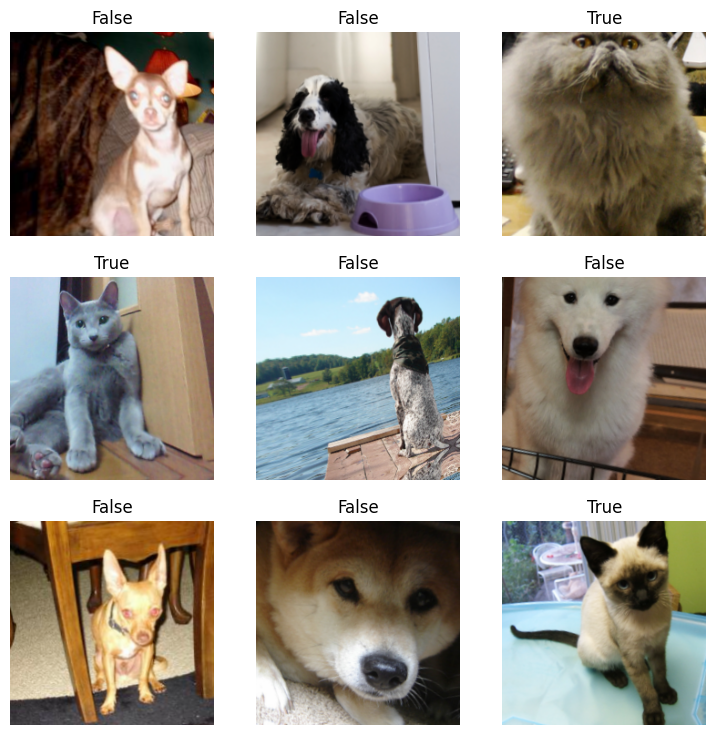

In [18]:
dls.show_batch()

In [20]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to C:\Users\Administrator/.cache\torch\hub\checkpoints\resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:14<00:00, 5.95MB/s]


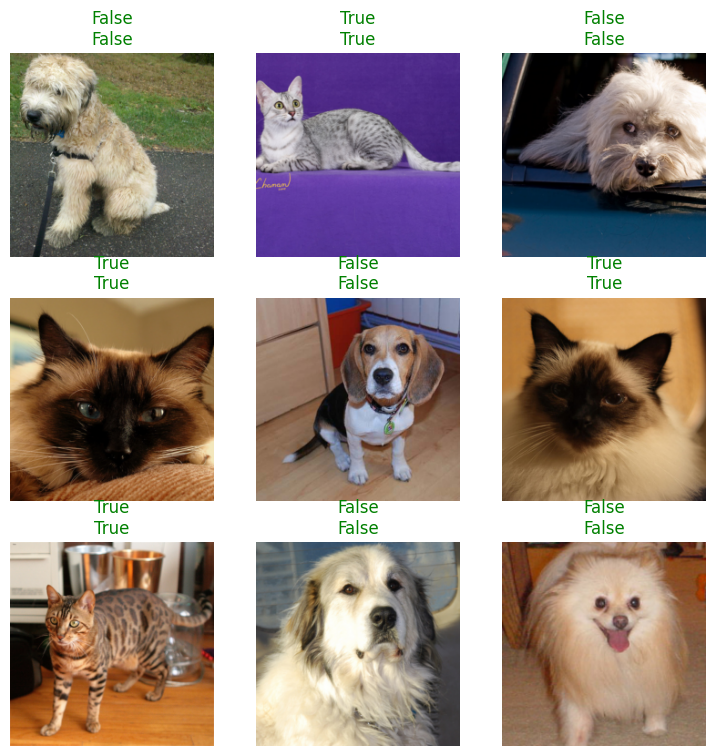

In [22]:
learn.show_results()

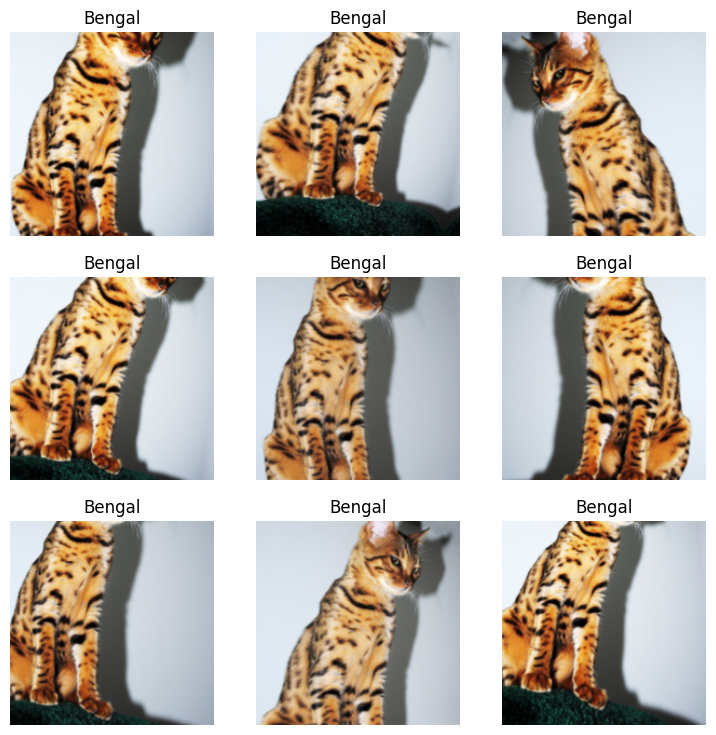

In [77]:
import re
# pat = r'^(.*)_\d+.jpg'
# pattern = re.compile(pat)
# pattern.search('xss_Abyssinian_1.jpg').groups()
pat = r'^(.*)_\d+.jpg'
def label_func(f):
    pattern = re.compile(pat)
    return pattern.search(f).group(1)

dls=ImageDataLoaders.from_name_func('cat_dog_classifier',files,label_func,item_tfms=Resize(224),batch_tfms=aug_transforms(size=224,min_scale=0.8))
# dls = ImageDataLoaders.from_name_re('cat_dog_classifier',files,pat,item_tfms=Resize(224),batch_tfms=aug_transforms())
dls.show_batch(unique=True)

In [78]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

D:\python\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
D:\python\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


SuggestedLRs(valley=0.0014454397605732083)

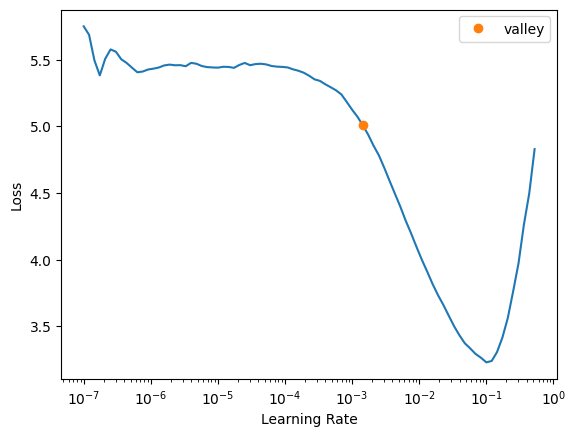

In [79]:
learn.lr_find()

In [80]:
learn.fine_tune(2, 1e-3)

In [86]:
for x in dls.train:
    print(x[0].shape,x[1].shape)
    break

torch.Size([64, 3, 224, 224]) torch.Size([64])


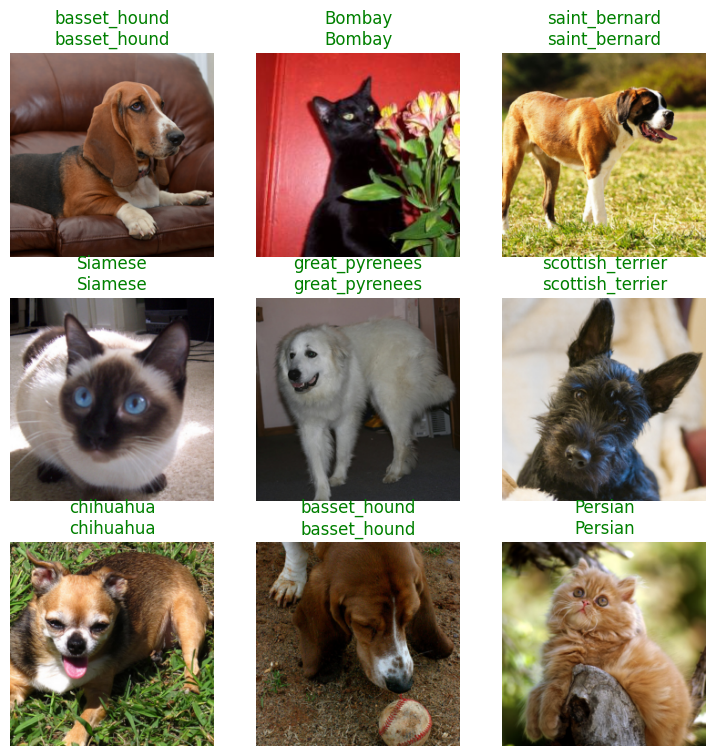

In [91]:
learn.show_results()

In [90]:
interp=ClassificationInterpretation.from_learner(learn)

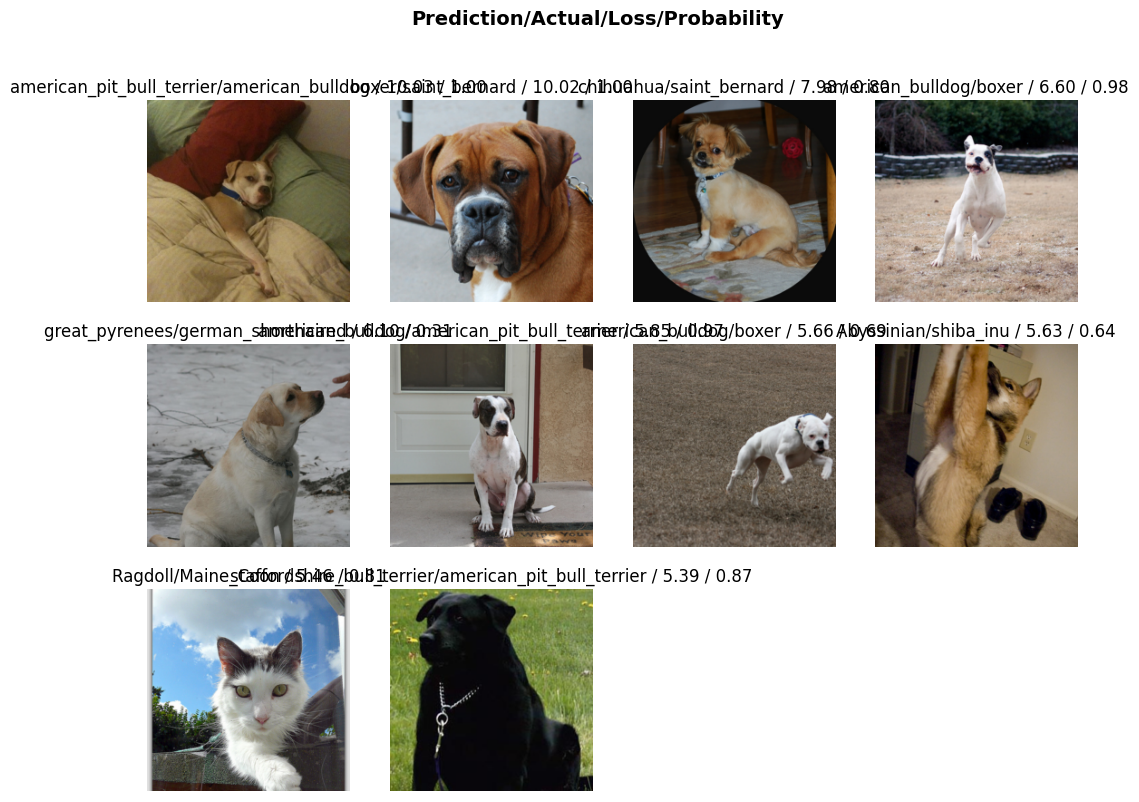

In [95]:
interp.plot_top_losses(10,)

In [96]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  